##### Image Classification Using Keras
Ensure you are using GPU
Runtime -> Change Runtime Type -> T4 GPU

xtrain_pre shape: (60000, 28, 28, 1, 1) , xtest_pre shape (10000, 28, 28, 1, 1)
Train Loss: 0.014184454455971718 , Train Acc: 0.9957833290100098
Test Loss: 0.023497428745031357 , Test Acc: 0.9919999837875366
Predicted First 3 Values: [7 2 1] , Actual First 3 Values: [7 2 1]
Img Predicted: [3] , Max Prob: 1.0
Out of Sample Prediction -  Img Predicted: [9] , Max Prob: 0.8754762


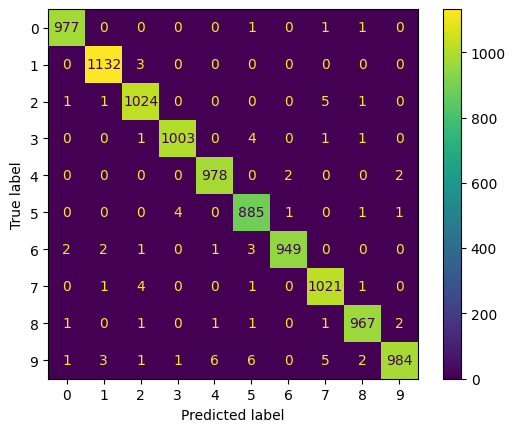

In [27]:
from warnings import filterwarnings; filterwarnings('ignore')

# Step-1: Data Ingestion
# ----------------------

# Loading images from existing dataset
from keras.datasets import mnist; (xtrain, ytrain), (xtest, ytest) = mnist.load_data()

# Step-2: Apply Preprocessing on Image
# ------------------------------------

# Pixel range is between 0-255 (Divide image results by 255 in order get values between 0-1)
xtrain_pre = xtrain.astype("float32") / 255.0; xtest_pre = xtest.astype("float32") / 255.0
xtrain_pre = xtrain.astype("float32") / 255.0; xtest_pre = xtest.astype("float32") / 255.0

# Add an extra dimension for filters in cnn
import numpy as np
xtrain_pre = np.expand_dims(xtrain_pre, -1); xtest_pre = np.expand_dims(xtest_pre, -1)
xtrain_pre = np.expand_dims(xtrain_pre, -1); xtest_pre = np.expand_dims(xtest_pre, -1)
print('xtrain_pre shape:', xtrain_pre.shape, ', xtest_pre shape', xtest_pre.shape)

# Convert ytrain & ytest to categorical

from keras.utils import to_categorical
ytrain_pre = to_categorical(ytrain); ytest_pre = to_categorical(ytest)

# Step-3: Build Neural Network Model
# ----------------------------------

from keras.models import Sequential
from keras.layers import Input, Dense, Convolution2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential(
    layers= [
        Input(shape=(28, 28, 1)), Convolution2D(filters=32, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2,2)), Convolution2D(filters=64, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2,2)), Flatten(), Dropout(0.5), Dense(10, activation='softmax' )
    ]
)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
seq_model = model.fit(xtrain_pre, ytrain_pre, validation_split=0.1, epochs=20, verbose=False)

# Step-4: Evaluate Model
# ----------------------

train_loss, train_acc = model.evaluate(xtrain_pre, ytrain_pre, verbose=False)
print('Train Loss:', train_loss, ', Train Acc:', train_acc)

test_loss, test_acc = model.evaluate(xtest_pre, ytest_pre, verbose=False)
print('Test Loss:', test_loss, ', Test Acc:', test_acc)

ytest_prob = model.predict(xtest_pre, verbose=False)

ytest_pred = np.argmax(ytest_prob, axis=1)
print('Predicted First 3 Values:', ytest_pred[0:3],', Actual First 3 Values:', ytest[0:3])

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ytest_pred)

# !uv  add  opencv-python

import cv2
img = cv2.imread("Example_3.jpg", cv2.IMREAD_GRAYSCALE)
inverted_img = cv2.bitwise_not(img)
img_pre = inverted_img.astype('float32') / 255.0
img_pre = np.expand_dims(img_pre, axis=0)

img_prob = model.predict([img_pre], verbose=False)
preds = np.argmax(img_prob, axis = -1)
max_probs = np.max(img_prob)
print('Img Predicted:', preds, ', Max Prob:', max_probs)

# Function for predicting digit

def predict_digit(img_path):
  img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  img_inv = cv2.bitwise_not(img)
  img_pre = img_inv.astype('float32') / 255.0
  img_pre = np.expand_dims(img_pre, axis=0)
  img_prob = model.predict([img_pre], verbose=False)
  img_pred = np.argmax(img_prob, axis=-1)
  img_max_prob = np.max(img_prob)
  return img_pred, img_max_prob

# Step-5: Out of Sample Prediction
# --------------------------------

img_pred, img_max_prob = predict_digit('Example_9.jpg')
print('Out of Sample Prediction - ', 'Img Predicted:', img_pred, ', Max Prob:', img_max_prob)

# Step-6: Save & Load Model
# -------------------------

model.save("Handwritten_model.keras")
from keras.models import load_model

m = load_model("Handwritten_model.keras")
# m


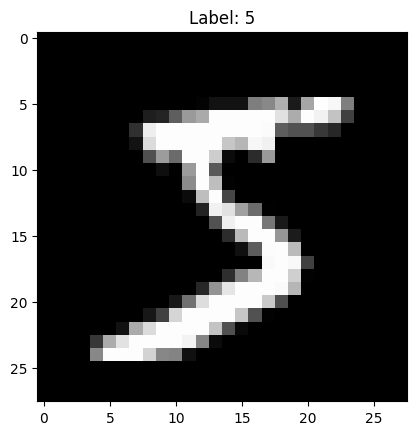

Index: 0 , Image: 43757
Index: 1 , Image: 50179
Index: 2 , Image: 31423


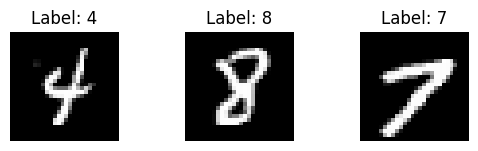

In [28]:
# Plot Data
import matplotlib.pyplot as plt
plt.title(f'Label: {ytrain[0]}')
plt.imshow(xtrain[0], cmap='gray')
plt.show()

# import seaborn as sns
# plt.figure(figsize=(12, 12))
# sns.heatmap(xtrain[0], cmap='gray', annot=True, fmt='d')
# plt.title(f'Label: {ytrain[0]}')
# plt.show()

import numpy as np
random_idx = np.random.randint(1, xtrain.shape[0], 3)
for idx, image in enumerate(random_idx):
    print('Index:', idx, ', Image:',image)
    plt.subplot(3, 3, idx + 1)
    plt.imshow(xtrain[image],cmap='gray')
    plt.title(f'Label: {ytrain[image]}')
    plt.axis("off")